In [ ]:
!pip install traci

In [ ]:
!pip install matplotlib
!pip install numpy

In [1]:
import os
import sys
if 'SUMO_HOME' in os.environ:
    sys.path.append(os.path.join(os.environ['SUMO_HOME'], 'tools'))
import traci

In [2]:
os.environ['SUMO_HOME']

'D:\\Sumo\\'

In [3]:
sumoBinary = os.environ['SUMO_HOME'] + "bin\sumo-gui"
westDragonBridgeCmd = [sumoBinary, "-c", os.environ['SUMO_HOME'] + "tools\westDragonBridge\osm.sumocfg"]
westTuyenSonBridgeCmd = [sumoBinary, "-c", os.environ['SUMO_HOME'] + "tools\westTuyenSonBridge\osm.sumocfg"]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
F:\\ipykernel_25852\1102609837.py:1: SyntaxWarning: invalid escape sequence '\s'
  sumoBinary = os.environ['SUMO_HOME'] + "bin\sumo-gui"
F:\\ipykernel_25852\1102609837.py:2: SyntaxWarning: invalid escape sequence '\w'
  westDragonBridgeCmd = [sumoBinary, "-c", os.environ['SUMO_HOME'] + "tools\westDragonBridge\osm.sumocfg"]
F:\\ipykernel_25852\1102609837.py:3: SyntaxWarning: invalid escape sequence '\w'
  westTuyenSonBridgeCmd = [sumoBinary, "-c", os.environ['SUMO_HOME'] + "tools\westTuyenSonBridge\osm.sumocfg"]


In [4]:
def get_edge_data(edge_id):
    """
    Get edge data from SUMO simulation.
    """
    edge_length = traci.edge.getLastStepLength(edge_id)
    edge_speed = traci.edge.getLastStepMeanSpeed(edge_id)
    edge_occupancy = traci.edge.getLastStepOccupancy(edge_id)
    return {
            'edge_id': edge_id,
            'length': edge_length,
            'speed': edge_speed,
            'occupancy': edge_occupancy
        }

In [5]:
def get_junction_data():
    """
    Get junction data from SUMO simulation.
    """
    junction_data = []
    for junction_id in traci.junction.getIDList():
        junction_position = traci.junction.getPosition(junction_id)
        junction_outgoing_edges = traci.junction.getOutgoingEdges(junction_id)
        junction_incoming_edges = traci.junction.getIncomingEdges(junction_id)
        junction_data.append({
            'junction_id': junction_id,
            'position': junction_position,
            'outgoing_edges': junction_outgoing_edges,
            'incoming_edges': junction_incoming_edges
        })
    return junction_data

In [6]:
def get_traffic_light_state(edge_id):
    """
    Get traffic light state of junction from SUMO simulation.
    """
    vehicles = traci.edge.getLastStepVehicleIDs(edge_id)
    if not vehicles:
        return None
    return traci.vehicle.getNextTLS(vehicles[0])

In [7]:
def get_approaching_vehicles(edge_id):
    """
    Get the IDs of vehicles approaching a traffic light.
    """
    vehicle_ids = traci.edge.getPendingVehicles(edge_id)
    return vehicle_ids

In [8]:
def get_density(edge_id):
    """
    Get the density of a lane.
    """
    density = traci.edge.getLastStepOccupancy(edge_id)
    return density

In [12]:
def get_min_free_capacity_edge(edge_id):
    """
    Get the minimum free capacity of a lane.
    """
    min_free_capacity = -1
    for lane_id in traci.lane.getIDList():
        if edge_id == traci.lane.getEdgeID(lane_id):
            full_capacity = traci.lane.getLength(lane_id)
            current_capacity = traci.lane.getLastStepOccupancy(lane_id) * full_capacity
            if min_free_capacity == -1:
                min_free_capacity = full_capacity
            min_free_capacity = min(min_free_capacity, full_capacity - current_capacity)

    return min_free_capacity

In [10]:
traci.start(westDragonBridgeCmd)

(21, 'SUMO 1.22.0')

In [ ]:
traci.start(westTuyenSonBridgeCmd)

In [11]:
step = 0

step_data = []
while step < 100:
    traci.simulationStep()

    edges = []
    for trafficlight_id in traci.trafficlight.getIDList():
        for lane in traci.trafficlight.getControlledLanes(trafficlight_id):
            edge_id = traci.lane.getEdgeID(lane)

            is_new = not any(edge['edge_id'] == edge_id for edge in edges)

            if is_new:
                trafficlight_phase_idx = traci.trafficlight.getPhase(trafficlight_id)
                trafficlight_duration = traci.trafficlight.getPhaseDuration(trafficlight_id)
                trafficlight_state = traci.trafficlight.getRedYellowGreenState(trafficlight_id)
                trafficlight_next_switch = traci.trafficlight.getNextSwitch(trafficlight_id)

                approaching_vehicles = get_approaching_vehicles(edge_id)
                density = get_density(edge_id)
                min_free_capacity = get_min_free_capacity_edge(edge_id)
                waiting_time = traci.edge.getWaitingTime(edge_id)
                travel_speed = traci.edge.getLastStepMeanSpeed(edge_id)
                travel_time = traci.edge.getTraveltime(edge_id)

                edges.append({
                    'edge_id': edge_id,
                    'trafficlight_phase_idx': trafficlight_phase_idx,
                    'trafficlight_duration': trafficlight_duration,
                    'trafficlight_state': trafficlight_state,
                    'trafficlight_next_switch': trafficlight_next_switch,
                    'approaching_vehicles': approaching_vehicles,
                    'density': density,
                    'min_free_capacity': min_free_capacity,
                    'waiting_time': waiting_time,
                    'travel_speed': travel_speed,
                    'travel_time': travel_time
                })

    step_data.append(edges)

    step += 1

traci.close()

Lane ID: 694830397.22_0, Full Capacity: 11.8, Current Capacity: 0.0
Lane ID: 694830397.22_1, Full Capacity: 11.8, Current Capacity: 0.0
Lane ID: 694830397.22_2, Full Capacity: 11.8, Current Capacity: 0.0
Lane ID: 694830397.22_3, Full Capacity: 11.8, Current Capacity: 0.0
Lane ID: E0_0, Full Capacity: 15.3, Current Capacity: 0.0
Lane ID: E0_1, Full Capacity: 15.3, Current Capacity: 0.0
Lane ID: E0_2, Full Capacity: 15.3, Current Capacity: 0.0
Lane ID: E0_3, Full Capacity: 15.3, Current Capacity: 0.0
Lane ID: E0_4, Full Capacity: 15.3, Current Capacity: 0.0
Lane ID: 693885804#1.60_0, Full Capacity: 1.14, Current Capacity: 0.0
Lane ID: 693885804#1.60_1, Full Capacity: 1.14, Current Capacity: 0.0
Lane ID: 693885804#1.60_2, Full Capacity: 1.14, Current Capacity: 0.0
Lane ID: 693885804#1.60_3, Full Capacity: 1.14, Current Capacity: 0.0
Lane ID: 693885804#1.60_4, Full Capacity: 1.14, Current Capacity: 0.0
Lane ID: 693885804#1.60_5, Full Capacity: 1.14, Current Capacity: 0.0
Lane ID: 698936203

In [13]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [14]:
def plot_duration_time(step_data):
    """
    Plot average duration time for each edge across steps.
    X-axis: step index
    Y-axis: average duration
    Each line: one edge_id
    """
    edge_to_durations = defaultdict(list)  # key = edge_id, value = list of durations per step

    for step_idx, step in enumerate(step_data):
        # Temporary holder for this step
        edge_step_durations = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            edge_step_durations[edge_id].append(edge['trafficlight_duration'])

        # Average duration per edge in this step
        for edge_id, durations in edge_step_durations.items():
            avg_duration = np.mean(durations)
            edge_to_durations[edge_id].append((step_idx, avg_duration))

    # Plot each edge_id as a separate line
    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_durations.items():
        steps, durations = zip(*values)  # unzip step indices and avg durations
        plt.plot(steps, durations, marker='o', label=edge_id)

    plt.xlabel('Step')
    plt.ylabel('Average Duration Time (s)')
    plt.title('Average Traffic Light Duration per Edge Across Steps')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

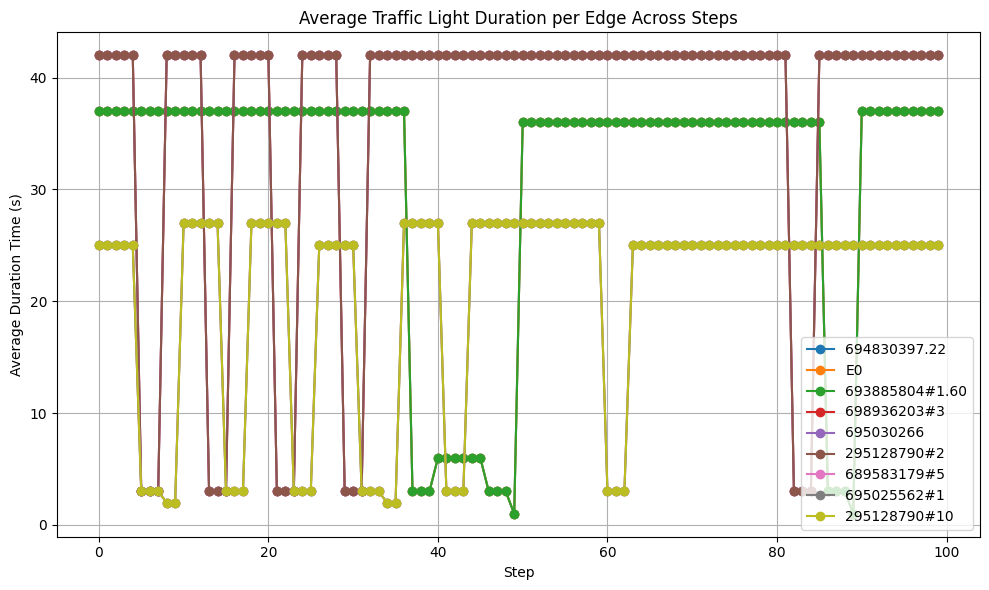

In [15]:
plot_duration_time(step_data)

In [16]:
def plot_approaching_vehicles(step_data):
    """
    Plot average number of approaching vehicles per edge across steps.
    X-axis: step index
    Y-axis: average number of vehicles
    Each line: one edge_id
    """
    edge_to_vehicles = defaultdict(list)  # key = edge_id, value = list of (step, avg_vehicles)

    for step_idx, step in enumerate(step_data):
        # Temporary holder for this step
        edge_step_vehicles = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            num_vehicles = len(edge['approaching_vehicles'])
            edge_step_vehicles[edge_id].append(num_vehicles)

        # Average number of vehicles per edge in this step
        for edge_id, vehicle_counts in edge_step_vehicles.items():
            avg_count = np.mean(vehicle_counts)
            edge_to_vehicles[edge_id].append((step_idx, avg_count))

    # Plot each edge_id as a separate line
    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_vehicles.items():
        steps, avg_counts = zip(*values)
        plt.plot(steps, avg_counts, marker='o', label=edge_id)

    plt.xlabel('Step')
    plt.ylabel('Average Number of Approaching Vehicles')
    plt.title('Approaching Vehicles per Edge Across Steps')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

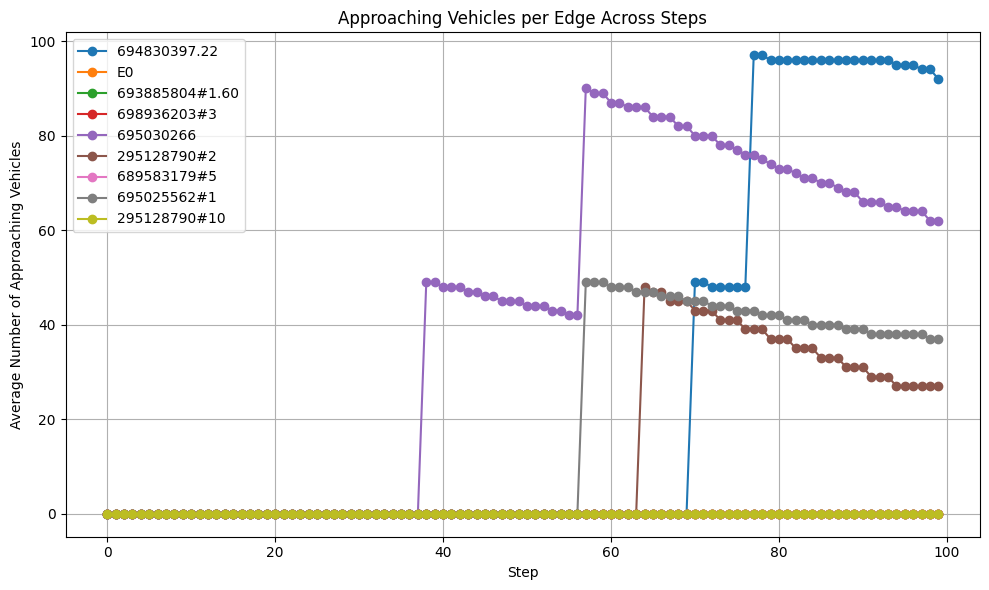

In [17]:
plot_approaching_vehicles(step_data)

In [18]:
def plot_density(step_data):
    """
    Plot the average density per edge across steps.
    X-axis: traffic light phase index
    Y-axis: density
    Each point: one edge_id
    """

    edge_to_density = defaultdict(list)

    for step_idx, step in enumerate(step_data):
        edge_step_density = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            edge_step_density[edge_id].append(edge['density'])

        for edge_id, density in edge_step_density.items():
            avg_density = np.mean(density)
            edge_to_density[edge_id].append((step_idx, avg_density))

    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_density.items():
        steps, avg_density = zip(*values)
        plt.plot(steps, avg_density, marker='o', label=edge_id)

    plt.xlabel('Step')
    plt.ylabel('Average Density')
    plt.title('Density per Edge Across Steps')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

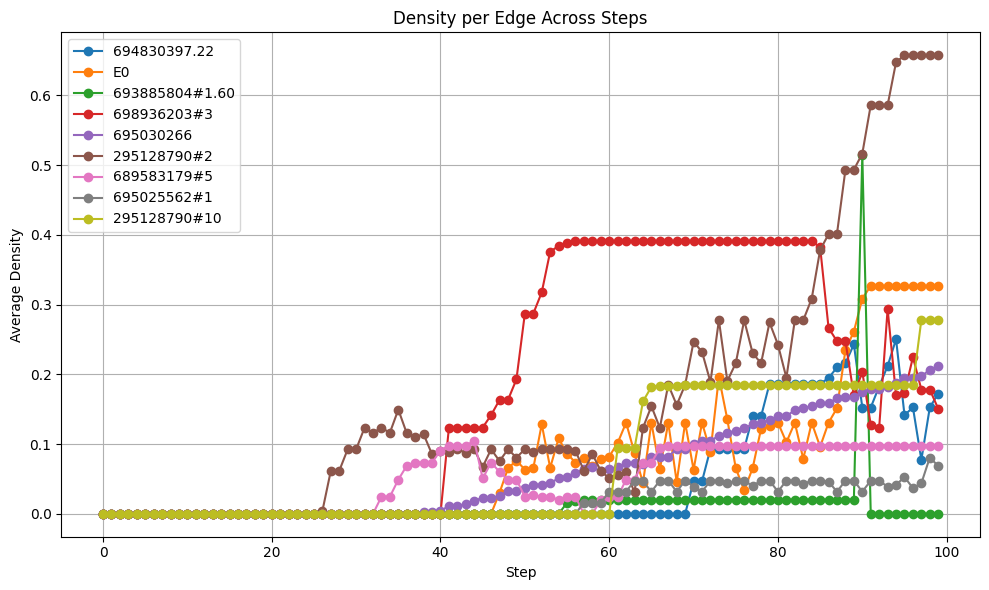

In [19]:
plot_density(step_data)

In [20]:
def plot_min_free_capacity(step_data):
    """
    Plot the minimum free capacity per edge across steps.
    X-axis: traffic light phase index
    Y-axis: minimum free capacity
    Each point: one edge_id
    """
    edge_to_min_free_capacity = defaultdict(list)
    for step_idx, step in enumerate(step_data):
        edge_step_min_free_capacity = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            min_free_capacity = edge['min_free_capacity']
            edge_step_min_free_capacity[edge_id].append(min_free_capacity)

        for edge_id, min_free_capacities in edge_step_min_free_capacity.items():
            avg_min_free_capacity = np.mean(min_free_capacities)
            edge_to_min_free_capacity[edge_id].append((step_idx, avg_min_free_capacity))

    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_min_free_capacity.items():
        steps, avg_min_free_capacity = zip(*values)
        plt.plot(steps, avg_min_free_capacity, marker='o', label=edge_id)

    plt.xlabel('Traffic Light Phase Index')
    plt.ylabel('Minimum Free Capacity')
    plt.title('Minimum Free Capacity per Edge Across Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

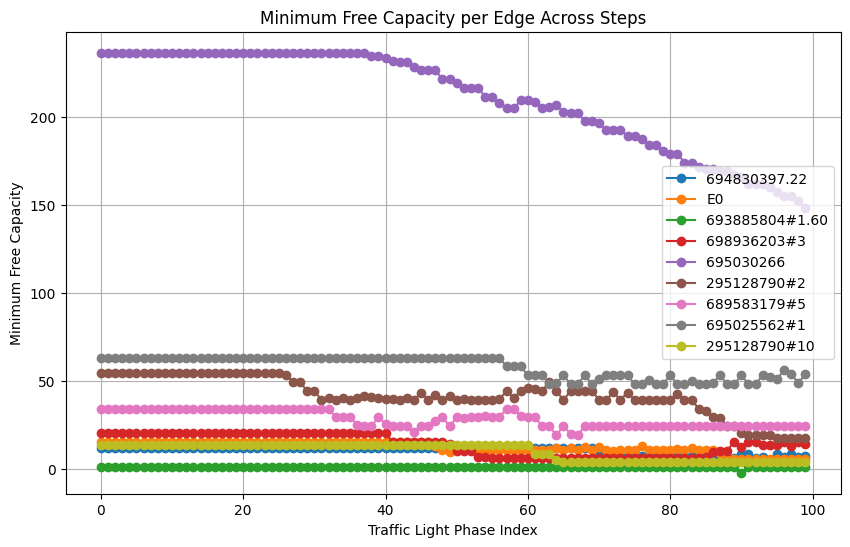

In [21]:
plot_min_free_capacity(step_data)

In [22]:
def plot_waiting_time(step_data):
    """
    Plot the waiting time per edge across steps.
    """
    edge_to_waiting_time = defaultdict(list)

    for step_idx, step in enumerate(step_data):
        edge_step_waiting_time = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            waiting_time = edge['waiting_time']
            edge_step_waiting_time[edge_id].append(waiting_time)

        for edge_id, waiting_times in edge_step_waiting_time.items():
            avg_waiting_time = np.mean(waiting_times)
            edge_to_waiting_time[edge_id].append((step_idx, avg_waiting_time))

    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_waiting_time.items():
        steps, avg_waiting_time = zip(*values)
        plt.plot(steps, avg_waiting_time, marker='o', label=edge_id)
    plt.xlabel('Traffic Light Phase Index')
    plt.ylabel('Waiting Time')
    plt.title('Waiting Time per Edge Across Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

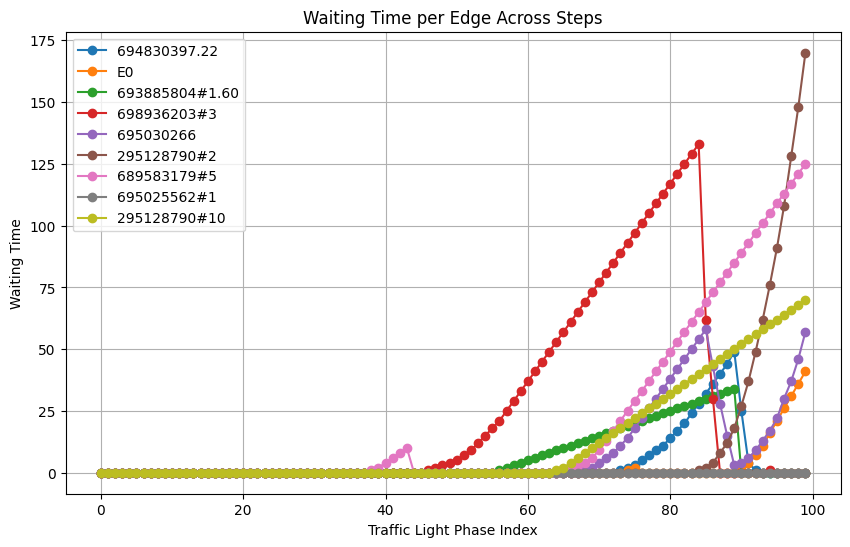

In [23]:
plot_waiting_time(step_data)

In [24]:
def plot_travel_time(step_data):
    """
    Plot the travel time per edge across steps.
    X-axis: traffic light phase index
    Y-axis: travel time
    Each point: one edge_id
    """
    edge_to_travel_time = defaultdict(list)
    for step_idx, step in enumerate(step_data):
        edge_step_travel_time = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            travel_time = edge['travel_time']
            edge_step_travel_time[edge_id].append(travel_time)

        for edge_id, travel_times in edge_step_travel_time.items():
            avg_travel_time = np.mean(travel_times)
            edge_to_travel_time[edge_id].append((step_idx, avg_travel_time))

    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_travel_time.items():
        steps, avg_travel_time = zip(*values)
        plt.plot(steps, avg_travel_time, marker='o', label=edge_id)

    plt.xlabel('Traffic Light Phase Index')
    plt.ylabel('Travel Time')
    plt.title('Travel Time per Edge Across Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

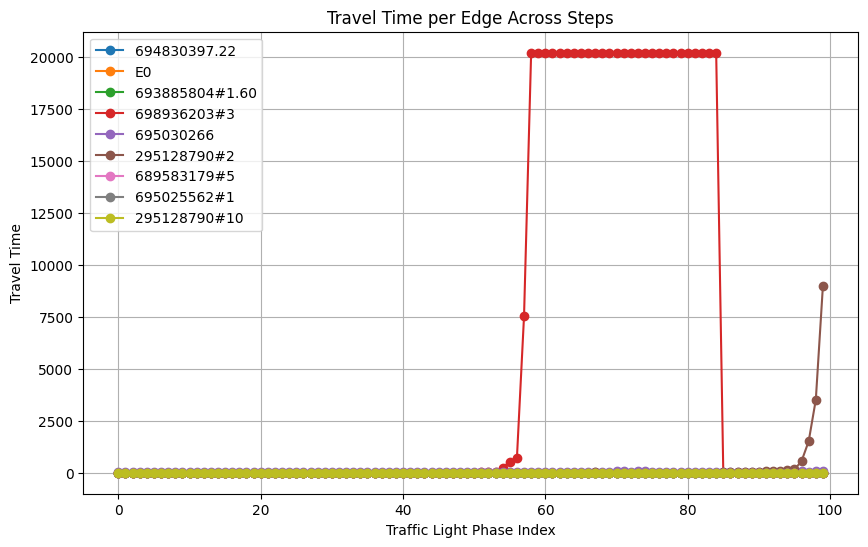

In [25]:
plot_travel_time(step_data)

In [26]:
def plot_travel_speed(step_data):
    """
    Plot the travel speed per edge across steps.
    """
    edge_to_travel_speed = defaultdict(list)

    for step_idx, step in enumerate(step_data):
        edge_step_travel_speed = defaultdict(list)

        for edge in step:
            edge_id = edge['edge_id']
            travel_speed = edge['travel_speed']
            edge_step_travel_speed[edge_id].append(travel_speed)

        for edge_id, travel_speeds in edge_step_travel_speed.items():
            avg_travel_speed = np.mean(travel_speeds)
            edge_to_travel_speed[edge_id].append((step_idx, avg_travel_speed))

    plt.figure(figsize=(10, 6))
    for edge_id, values in edge_to_travel_speed.items():
        steps, avg_travel_speed = zip(*values)
        plt.plot(steps, avg_travel_speed, marker='o', label=edge_id)

    plt.xlabel('Traffic Light Phase Index')
    plt.ylabel('Travel Speed')
    plt.title('Travel Speed per Edge Across Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

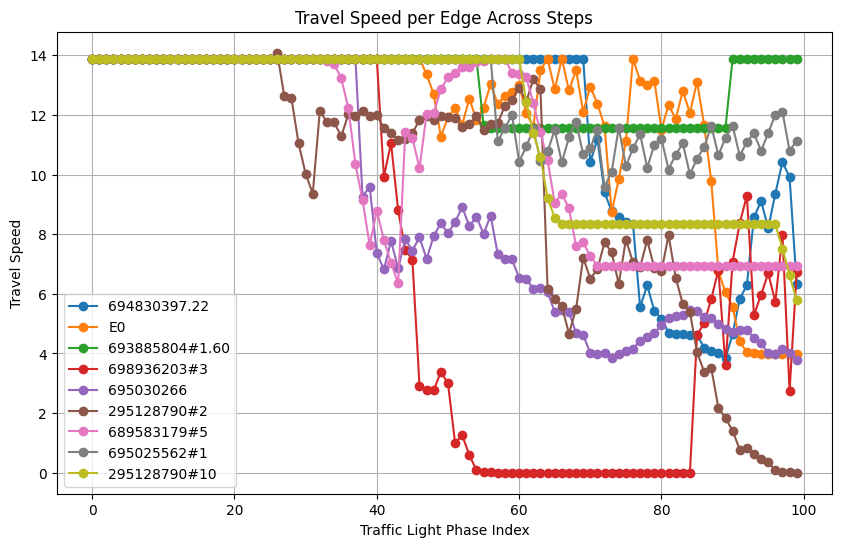

In [27]:
plot_travel_speed(step_data)